In [439]:
#! Required python packages: numpy, scipy, scikit-learn, matplotlib, seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Fill in your name and your partner's name below** (and name the `.ipynb` file correctly):

---

### YAP MING YANG

---

# Exercise 2 - Machine Learning & Optimization (DD1420)

## Instructions

This Jupyter Notebook contains exercises for DD1420 **Module 2: Machine Learning & Optimization**. To receive credit, all cells must be completed and must function correctly.

### Collaboration

- **Collaboration**: You are allowed to work on this exercise in pairs. However, each student must submit their own completed notebook. If you worked with a partner, please indicate your partner in the filename as described below.
- **Code of Conduct**: Adhere to the following:
  1. All group members are responsible for the work submitted.
  2. Each student must honestly disclose any assistance received or external sources used.
  3. Do not copy from other students' solutions. If you need help, use the appropriate Discussion Topic or sign up for a help session.

### Completing the Exercise

- **Code Cells**: Replace any placeholder comments like `YOUR CODE HERE` or "YOUR ANSWER HERE" with your own code or response. Once implemented, delete any instances of `raise NotImplementedError()`.
- **Library Imports**: Do not import any additional libraries beyond those already included in the assignment.
- **Derivations**: For derivation questions, you may use $\LaTeX$ in markdown cells or upload an image of your handwritten derivation. In *Google Colab*, to upload an image, create a text cell, click the `Insert Image` icon, and upload your file.

### Submission Instructions

1. **Final Check**: Before submitting, ensure everything runs correctly by selecting `Runtime` -> `Restart and Run All`.
2. **File Naming**: Download the notebook by selecting `File` -> `Download` -> `Download .ipynb`. Rename the file as follows:
  - `Ex??_YOURLASTNAME_YOURFIRSTNAME_and_PARTNERLASTNAME_PARTNERFIRSTNAME.ipynb`
  - Replace `??` with the correct exercise number. If you worked alone, omit the partner's name from the filename.
3. **Submission**: Submit the `.ipynb` file to Canvas.

### Oral Examination

- **Preparation**: During the oral examination, you will be asked to demonstrate and explain your work. Have the link to your `.ipynb` file ready, with all cells executed.



## 2.1 Linear Regression with RANSAC


A mad scientist has created an artificial dataset $D = \{(x_i, y_i)\}_{i=1}^n$ according to the equation:

$$
y = e \cdot x + e + \varepsilon
$$

where $e$ is the Euler constant, and $\varepsilon \in U(-1, 1)$, meaning $\varepsilon$ is a random error sampled from a uniform distribution over the interval $(-1, +1)$.

Our objective is to reverse-engineer the parameters $w = e$ and $b = e$ by performing linear regression on this dataset. The dataset $D$ is generated using the following Python code:


In [440]:
import numpy as np
N = 100
xs = np.linspace(0, 10, N)
ys = np.e * xs + np.e + (2 * np.random.rand(N) - 1)

Here, np.random.rand generates uniform random samples within the unit interval $(0, 1)$. We transform these samples into the desired interval $(-1, 1)$ by multiplying each sample by 2 and subtracting 1.

You can visualize the generated dataset by plotting the points:

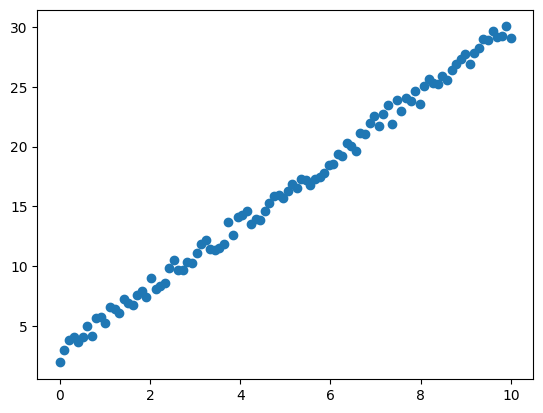

In [441]:
import matplotlib.pyplot as plt
plt.scatter(xs, ys)

**Applying the RANSAC Algorithm**

We will apply a simplified version of the RANSAC (Random Sample Consensus) algorithm to identify the parameters $w$ and $b$. The algorithm proceeds in the following steps:

1. **Randomly select two points** from the dataset.
2. **Find the line** that passes through these two points. This line will have a slope $w$ and an intercept $b$.
3. **Evaluate the line** by checking how well it fits the remaining points in the dataset. Specifically, we measure how many points lie within a certain distance (inlier threshold) from the line.

**Key Considerations**

- **Iteration**: RANSAC typically iterates over many random pairs of points, repeatedly applying the above steps. The line that best fits the majority of the points (i.e., has the most inliers) is selected as the final model.

- **Parameter Estimation**: Once the best line is found, the final parameters $w$ and $b$ are estimated from the inliers.


**2.1.1.** *Write a function ```size_two_subsets = all_size_two_subsets(ls)``` that accepts a list ```ls``` as input and outputs a list ```size_two_subsets``` of all subsets of size 2.*

In [442]:
def all_size_two_subsets(ls):
  """Returns a list of all subsets of size two."""
  new_list = []
  for i in range(len(ls)):
    for j in range(i+1, len(ls)):
      new_list.append((ls[i], ls[j]))
  return new_list


**2.1.2. Fitting a Line**

*Write a function `w, b = linear_fit(x1, y1, x2, y2)` that accepts two points \( p_1 = (x_1, y_1) \) and \( p_2 = (x_2, y_2) \), and outputs the parameters \( w \) and \( b \) of the line defined by \( w \cdot x + b \) that passes through these two points.*

*The function should calculate the slope \( w \) as the change in \( y \) divided by the change in \( x \), and then determine the intercept \( b \) using one of the points. This will form the linear equation that best fits the two points.*


In [443]:
def linear_fit(x1, y1, x2, y2):
  """Returns w,b that fit (x1,y1) and (x2,y2)"""
  dy = y2-y1
  dx = x2-x1
  if (dx == 0):
    w = np.inf
    b = None
  else:
    w = dy/dx
    b = y1-w*x1
  return (w, b)

**2.1.3. Scoring the Fit**

*Write a function `score_candidate(w, b, xs, ys)` that computes how well the linear equation \( w \cdot x + b \) fits the entire dataset. To do this, calculate the difference between each actual \( y_i \) value and the predicted value from the equation, \( w \cdot x_i + b \).*

*Your function should compute the Root Mean Square Error (RMSE), which is a common metric for measuring the average magnitude of the errors between predicted and actual values. RMSE gives you a sense of how well your line approximates the data points:*
- **Lower RMSE values** indicate a better fit.
- **Higher RMSE values** suggest a poor fit, potentially due to outliers or an incorrect model.


In [444]:
def score_candidate(w, b, xs, ys):
  """Returns the RMSE for a given w,b"""
  res = 0
  for i in range(len(xs)):
    predicted_val = w*xs[i]+b
    actual_val = ys[i]
    diff = actual_val-predicted_val
    res += diff**2
  return (res/len(xs))**(1/2)




How good of a fit we get if we use the first two points in the list?




RMSE = 45.076854721848875


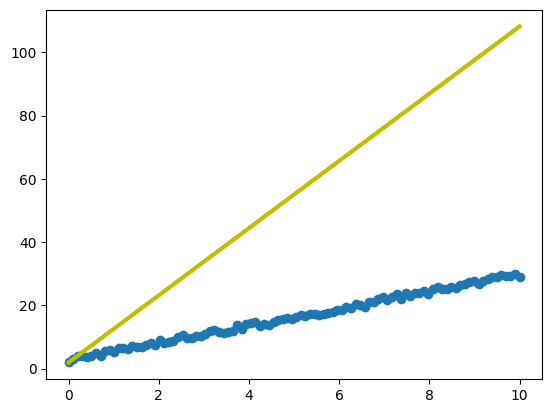

In [445]:
x1 = xs[0]
x2 = xs[1]
y1 = ys[0]
y2 = ys[1]
w,b = linear_fit(x1,y1,x2,y2)
print('RMSE =',score_candidate(w,b,xs,ys))
plt.scatter(xs, ys)
plt.plot(xs, w * xs + b, 'y-', linewidth=3)

**2.1.4. Applying Simplified RANSAC**

*Now, implement a simplified RANSAC algorithm by evaluating `score_candidate` for every possible two-element subset from `size_two_subsets`. Your goal is to find the best-fitting parameters $w^\star$ and $b^\star$ by minimizing the RMSE across all possible pairs.*

*For each subset, calculate $w$ and $b$ using your `linear_fit` function, and then determine the RMSE using `score_candidate`. Track the best $w$ and $b$ values, and print them each time the RMSE improves, along with the current RMSE score.*

This iterative process simulates how RANSAC refines the fit by continuously searching for the best line that represents the dataset.


10.61998143080663 1.9533909639025357 45.076854721848875
9.367391699405452 1.9533909639025357 37.827729193890626
7.079833187197697 1.9533909639025357 24.590354413056893
4.160306155090418 1.9533909639025357 7.7117544980208015
3.0908977902008927 1.9533909639025357 1.6350322388467458
2.9753701326301867 1.9533909639025357 1.0600147444913421
2.8353871287414654 1.9533909639025357 0.6664423848627309
2.8305356759038713 1.9533909639025357 0.6664356104005877
2.7012456003294876 2.753263270011338 0.5483096558931697
2.724552090035155 2.7509090791319775 0.5471044144928359
2.7108918112221696 2.7522889052747033 0.5438881260125881
2.7116956621298933 2.7479854610212344 0.5437980786479776


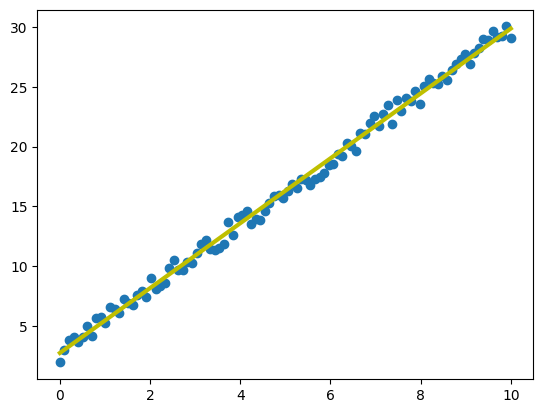

In [446]:
w_star, b_star = None, None

pts = np.stack([xs, ys], axis=1)
size_two_subsets = all_size_two_subsets(pts)
w_star, b_star = None, None
best_score = np.inf
for size_two_subset in size_two_subsets:
  x1, y1 = size_two_subset[0]
  x2, y2 = size_two_subset[1]
  w, b = linear_fit(x1, y1, x2, y2)
  if b == None:
    continue
  current_score = score_candidate(w, b, xs, ys)
  if current_score < best_score:
    best_score = current_score
    w_star, b_star = w, b
    print(w_star, b_star, best_score)

# plotting your solution
plt.scatter(xs, ys)
plt.plot(xs, w_star * xs + b_star, 'y-', linewidth=3)

## 2.2 Applying the algebraic solution to linear regression

Now that you have an intuition of how linear regression works through RANSAC and basic point selection, let's solidify your understanding by applying some basic linear algebra. In this exercise, you will use an algebraic approach to linear regression. Below is a small dataset generated by the mad scientist.

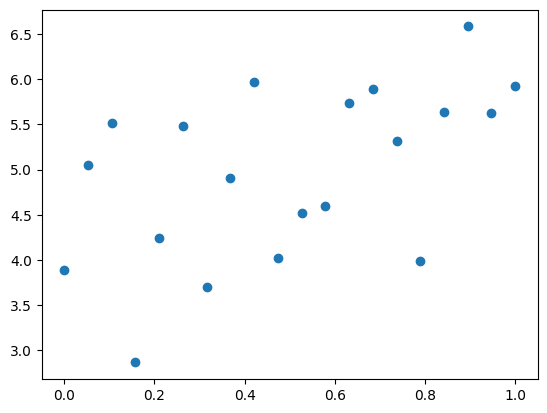

In [447]:
import numpy as np
import matplotlib.pyplot as plt
n = 20
xs = np.linspace(0, 1, n)
ys = np.e * xs + np.pi + np.random.randn(n)
plt.scatter(xs, ys);

**2.2.1** *Show that prepending $1$s to $x$ and having a single matrix multiplication using $\theta^T$ is equivalent to the linear equation $ y = w^T x + b$.*

*hint: You can explicitly do the multiplication after defining the new terms, e.g.,*

$ \theta^T =
 \begin{bmatrix}
  b_{1} & w_{1,1} & \cdots & w_{1,n}\\
  b_{2} & w_{2,1} & \cdots & w_{2,n} \\
  \vdots  & \vdots & \ddots & \vdots \\
  b_{m} & w_{m,1} & \cdots & w_{m,n}
 \end{bmatrix} = \begin{bmatrix}
  b_{1} & 0 & \cdots & 0\\
  b_{2} & 0 & \cdots & 0 \\
  \vdots  & \vdots & \ddots & \vdots \\
  b_{m} & 0 & \cdots & 0
 \end{bmatrix} + \begin{bmatrix}
  0 & w_{1,1} & \cdots & w_{1,n}\\
  0 & w_{2,1} & \cdots & w_{2,n} \\
  \vdots  & \vdots & \ddots & \vdots \\
  0 & w_{m,1} & \cdots & w_{m,n}
 \end{bmatrix}$


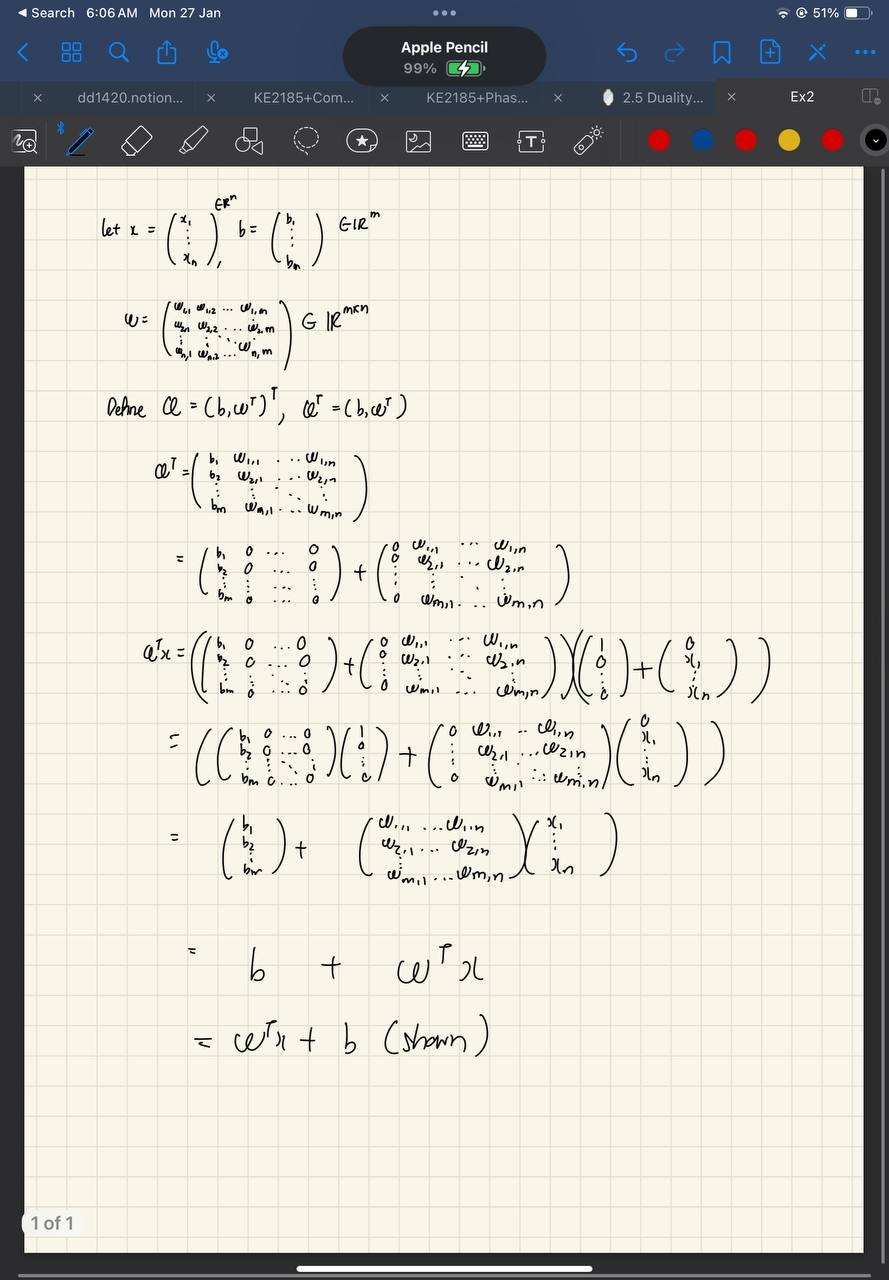

**2.2.2** *Write a function ```b, w = linear_regression(x, y)``` that performs linear regression using the algebraic solution. Recall that the function that we want to minimize is*

$L = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$


 *Use the matrix solution we found in the lecture notes for $\theta^*$. Apply it to the dataset above. Plot the solution and print the values.*

w =  1.604254609944611 b =  4.169968502008339


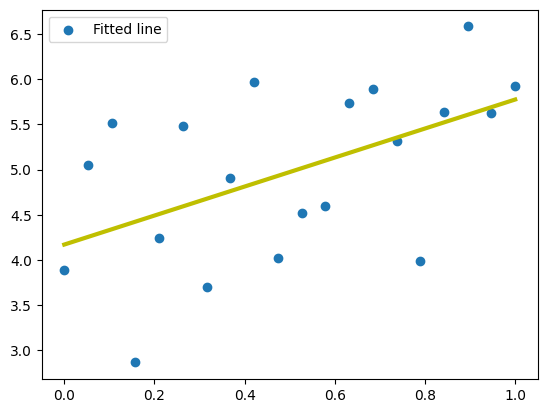

In [448]:
def linear_regression(xs, ys):
    """
    Returns an algebraic solution for w,b given
    xs: np.ndarray of shape [n]
    ys: np.ndarray of shape [n]
    """
    ones = np.ones(shape=(len(xs)), dtype=int)
    new_xs = np.stack((ones, xs), axis = -1)
    xs_transpose = np.transpose(new_xs)
    gram_mat = np.matmul(xs_transpose, new_xs)
    gram_inv = np.linalg.inv(gram_mat)
    theta = np.matmul(np.matmul(gram_inv, xs_transpose), ys)
    return theta
b, w = linear_regression(xs,ys)
print('w = ', w, 'b = ', b)
zs = xs*w + b
_, ax = plt.subplots()
ax.scatter(xs, ys)
ax.plot(xs, zs, 'y-', linewidth=3);
ax.legend(['Fitted line']);

## 2.3 Using linear regression for non-linear relationships


Linear regression is often misunderstood in the sense that people believe that it can only be used to fit "lines" (i.e. for *linear* relationships between $x$ and $y$) even though the "linearity" refers to being linear with respect to the weights (i.e. the relationship between $w$ and $y$ is assumed to be linear).

Take a look at graph of the dataset $\mathcal{D} = \lbrace (x_i, y_i) \rbrace$ showing a non-linear relationships between $x$ and $y$:

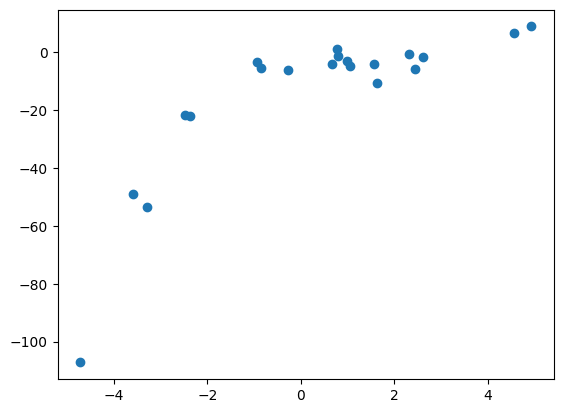

In [449]:
import numpy as np
import matplotlib.pyplot as plt

n = 20
np.random.seed(0)
xs = 2 - 3 * np.random.normal(0, 1, n)
ys = xs - 2 * xs ** 2 + 0.5 * xs ** 3 + np.random.normal(-3, 3, n)
plt.scatter(xs,ys);

If we naively apply **SK-learn**'s linear regression function, we use the model

$y = \theta^{\intercal}x = w^T x + b$

and we just end up fitting a straight line though the points. 😞

RMSE =  15.908242501429998


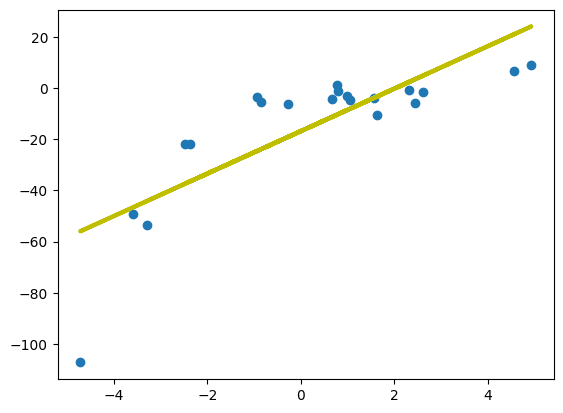

In [450]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# here is how you define and train a model with sklearn
model = LinearRegression()
model.fit(xs[:, np.newaxis], ys[:, np.newaxis])

# here is how you make predictions
y_pred = model.predict(xs[:, np.newaxis])

rmse = np.sqrt(mean_squared_error(ys,y_pred))
print('RMSE = ', rmse)

plt.scatter(xs, ys)
plt.plot(xs, y_pred, 'y-', linewidth=3)
plt.show()

To achieve a better fit for this non-linear relationship, we can use a cubic polynomial. This means transforming our original input \( x \) into polynomial features. Define $ \Phi(x) = \begin{bmatrix} 1 \\ x \\ x^2 \\ x^3 \end{bmatrix} $, then the model equation is:


$y = \theta^T \Phi(x) = b + w_1x + w_2x^2 + w_3x^3$


Notice that while the model now captures non-linear relationships between $ x $ and $ y $, the relationship between the parameters $ \theta $ and the output $ y $ remains linear. This is the key idea behind using linear regression with polynomial features.


**2.3.1.** *Write a function ```x_poly = polynomial_features(x)```** that computes $\Phi(x)$ for each $x$, transforming it to ``x_poly``.*

In [451]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_features(xs):
    """
    x: A np.ndarray of shape [N]
    Returns:
        x_poly: A np.ndarray of shape [N, 4]
    """
    xs = xs.reshape(-1, 1)
    x_poly = np.ones((len(xs), 1))
    for power in range(1, 4):
        new_xs = np.power(xs, power).reshape(-1, 1)
        x_poly = np.hstack((x_poly, new_xs))
    return x_poly

You can do the same thing, with less coding, using the sklearn library as well. Try that here and double check you are getting the same results.

*hint: [look up](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) the function we imported.*

In [452]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_features_sklearn(x):
    """
    x: A np.ndarray of shape [N]
    Returns:
        x_poly: A np.ndarray of shape [N, 4]
    """
    polynomial_features= PolynomialFeatures(degree=3)
    x_poly = polynomial_features.fit_transform(x[:, np.newaxis])
    return x_poly

In [453]:
assert np.allclose(polynomial_features_sklearn(xs), polynomial_features(xs))

Our goal here will be to get the model to predict the outputs given the (polynomial) input features. Here is how you would get the predictions (not the coefficients) in sklearn:



```
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
predictions = model.predict(x)
```


There is an obvious question here: Why would we try and predict *y* values for points we already know the *y*? The answer is that we usually would not, at least not in ML. This exercise is just to get your feet wet.

**2.3.2** *Write a function `w = polynomial_linear_regression(x_poly, y)` that performs linear regression on the transformed polynomial features `x_poly` and outputs the optimal parameter vector $ \theta^* \in \mathbb{R}^4 $. This parameter vector represents the best-fit weights $ \theta $ for the cubic polynomial model.*

*Hint*: Use the `LinearRegression` model from sklearn, and ensure you retrieve the coefficients after fitting the model.


In [454]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def polynomial_linear_regression(x_poly, ys):
    """
    x: A np.ndarray of shape [N, 4]
    y: A np.ndarray of shape [N]
    Returns:
        w: A np.ndarray of shape [4]
    """
    model = LinearRegression(fit_intercept=False)
    model.fit(x_poly, ys)
    return model.coef_

**2.3.3** *Write a function* ```y_poly_pred = apply_weights(x_poly, w)``` *that applies the weights to* $x$, $\theta^{\intercal}\phi(x)$ *to get a prediction.*

In [455]:
def apply_weights(x_poly, w):
    """
    x_poly: A np.ndarray of shape [N, 4]
    w: A np.ndarray of shape [4]
    Returns:
      y_pred: the predicted value for x
    """
    y_pred = np.matmul(x_poly, w)
    return y_pred

**2.3.4.** Fit the model to the transformed polynomial data to find $ \theta^* $. After fitting the model, compute the RMSE (Root Mean Square Error) to evaluate how well your model's predictions match the actual data.

*Hint*: Use the `mean_squared_error` function from sklearn to calculate RMSE conveniently by taking the square root of the mean squared error value.


In [456]:
from sklearn.metrics import mean_squared_error
x_poly = polynomial_features(xs)
w = polynomial_linear_regression(x_poly, ys)
y_poly_pred = apply_weights(x_poly, w)
rmse = np.sqrt(mean_squared_error(ys,y_pred))
print('RMSE = ', rmse)

RMSE =  15.908242501429998


Finally, let's visualize the polynomial fit by plotting the predicted curve against the original data points. This will allow us to see how well the cubic polynomial model captures the non-linear relationship between $ x $ and $ y $.


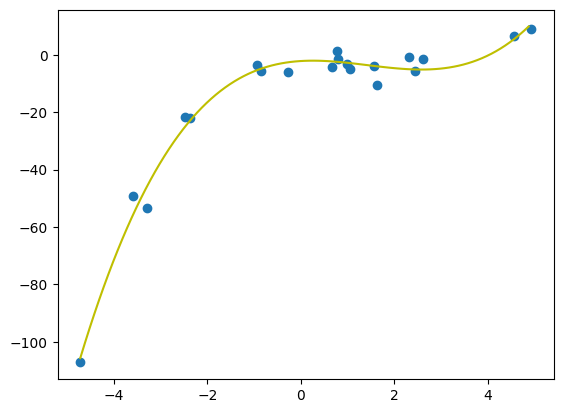

In [457]:
xi = np.arange(min(xs),max(xs),0.1)
xi_poly = polynomial_features(xi)
yi_poly_pred = apply_weights(xi_poly,w)

plt.scatter(xs, ys)
plt.plot(xi, yi_poly_pred,'y-')
plt.show()

## 2.4 Logistic regression



In this exercise, we will explore logistic regression, a powerful technique for binary classification. The mad scientist has provided us with another dataset, but this time it consists of two distinct classes, represented by yellow and blue samples.

Our goal is to use logistic regression to classify these samples into their respective classes and understand the underlying theory and implementation of the algorithm.

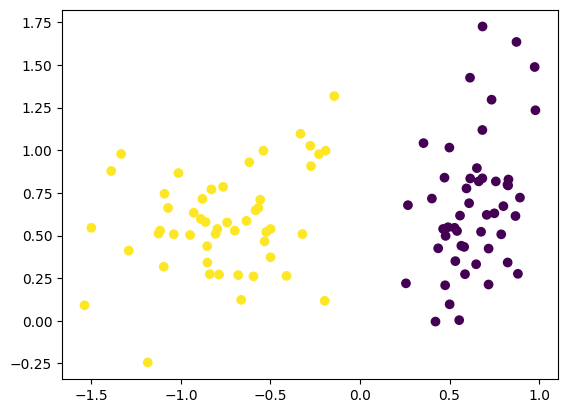

In [458]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
xs, ys = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=.65)
plt.figure(0)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=ys);

This dataset presents a clear binary classification problem, where our task is to assign each sample to one of two classes. Logistic regression is particularly well-suited for this type of problem because it models the probability that a given sample belongs to a particular class using a sigmoid function.


<br>

As we saw in the Lecture Notes, *logistic regression* is motivated by the desire to classify a sample (e.g. some vector) into two classes $\pmb{y} = \{0,1\}$.

<br>

$\mathcal{P}_{\pmb{y}|\pmb{x}} (y| \pmb{x} = x_i) = p^{\pmb{y}} (1-p)^{1-\pmb{y}}\quad $   

<br>

where $\quad \hat{p} = \sigma(\theta^{\intercal} x_i) $ and $\sigma(x) = \frac{1}{1+e^{-x}}$ is the so-called *sigmoid* (or logistic) function. Plugging in gives

<br>

$\mathcal{P}_{\pmb{y}|\pmb{x}} (y| \pmb{x} = x_i) = \sigma(\theta^{\intercal} x_i)^{y_i} \, (1 - \sigma(\theta^{\intercal} x_i))^{1-y_i}$

<br>

and taking the $\log$ gives the *binary cross entropy* loss

<br>

$\begin{align}
\log \mathcal{P}_{\pmb{y}|\pmb{x}} (y| \pmb{x} = x_i)
&= y_i \log \sigma(\theta^{\intercal} x_i) - (1 - y_i) \log (1-\sigma(\theta^{\intercal} x_i)) \\
&= y_i \log \sigma(w^{\intercal} x_i + b) - (1 - y_i) \log (1-\sigma(w^{\intercal} x_i + b))
\end{align}$

<br>


We can turn this into a total loss function $L$ by summing over the dataset and adding a minus ($-$) sign because we want to minimize it

<br>

$\begin{align}
L(w,b) &= -\sum_{i=1}^n \lbrace y_i \cdot \log \sigma(w^T \cdot x_i + b) + (1-y_i) \cdot \log (1 - \sigma(w^T \cdot x_i + b))  \rbrace
\end{align}$

This loss function measures how well the logistic regression model predicts the true class labels across the entire dataset.


**2.4.1** *To optimize the logistic regression model, we need to compute the gradients of the binary cross-entropy loss with respect to the model parameters $ w $ and $ b $. These gradients will guide the update of the model parameters during training.*

*In this task, you will derive the gradient of the loss function with respect to $ w $. This is a crucial step in understanding how logistic regression learns from data. Fill in the missing steps to show that the derivative of the total binary cross-entropy loss $ L $ with respect to $ w $ is given by...*

$\begin{align}
\frac{\partial}{\partial w}\, L(w,b) &= \frac{\partial}{\partial w}\, -\sum_{i=1}^n \lbrace y_i \cdot \log \sigma(w^T \cdot x_i + b) + (1-y_i) \cdot \log (1 - \sigma(w^T \cdot x_i + b))  \rbrace
\end{align}$

<br>

$\color{green}{\text{YOUR ANSWER HERE}}$
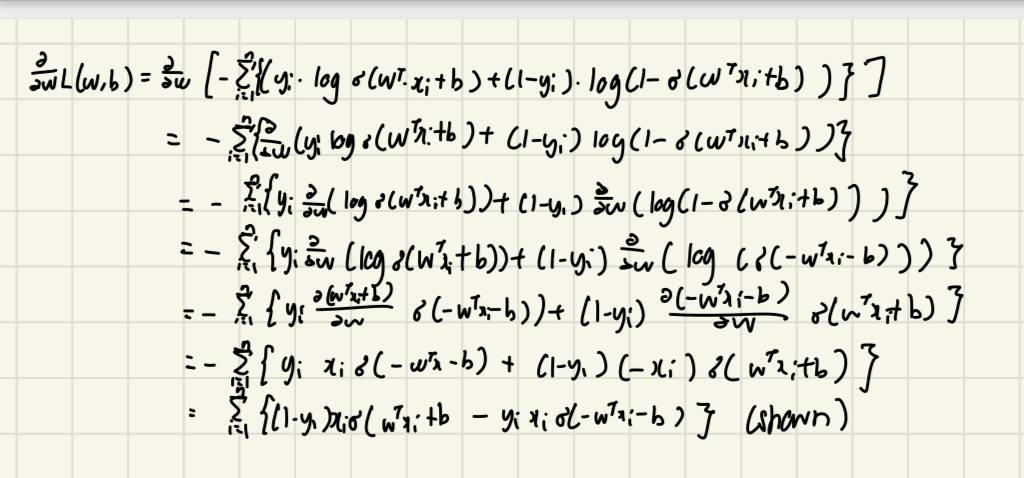
<br>

$\begin{align}
\frac{\partial}{\partial w}\, L(w,b) &= \sum_{i=1}^n \lbrace (1-y_i) \cdot x_i \cdot \sigma(w^T x_i + b) - y_i \cdot x_i \cdot \sigma(-w^T x_i - b) \rbrace
\end{align}$


Hint: a couple of identities can help simplify the equations:

\begin{align}
1 - \sigma(x) &= \sigma(-x) \\
\frac{\partial}{\partial \mathbf{w}} \log \sigma(g(\mathbf{w})) &= \frac{\partial g}{\partial \mathbf{w}} \cdot \sigma(-g(\mathbf{w}))
\end{align}

**2.4.2** *Show that the derivative of the binary cross entropy loss* $L$ *w.r.t. $b$ is given by (fill in the missing steps)*

$\begin{align}
\frac{\partial}{\partial b}\, L(w,b) &= \frac{\partial}{\partial b}\, -\sum_{i=1}^n \lbrace y_i \cdot \log \sigma(w^T x_i + b) + (1-y_i) \cdot \log (1 - \sigma(w^T x_i + b))  \rbrace
\end{align}$

<br>

$\color{green}{\text{YOUR ANSWER HERE}}$
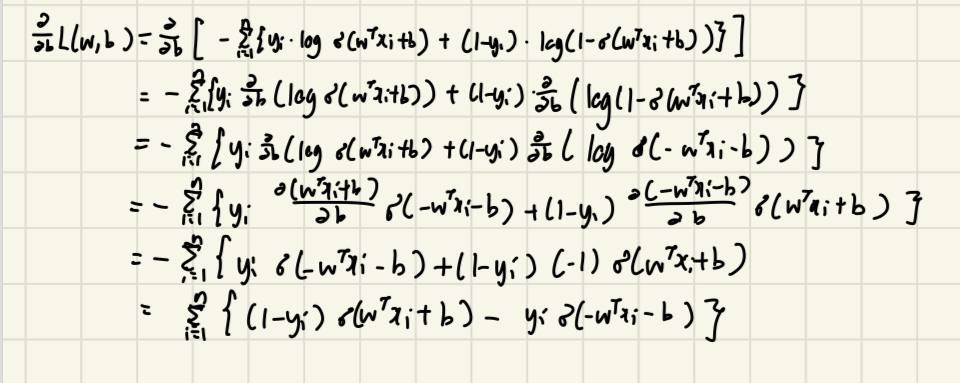

<br>

$\begin{align}
\frac{\partial}{\partial b}\, L(w,b) &= \sum_{i=1}^n \lbrace (1-y_i) \cdot \sigma(w^T x_i + b) - y_i \cdot \sigma(-w^T x_i - b) \rbrace
\end{align}$

With these gradients in hand, your task is now to implement *batch stochastic gradient descent (SGD)*. Instead of looping over all samples $n$ you will loop over $B$ samples.

**2.4.3**  *Write a function `xs_batch, ys_batch = sample_batch(xs, ys, B)` that randomly samples $ B $ elements from both `xs` and `ys`. This function should return two arrays: `xs_batch` containing the sampled input features, and `ys_batch` containing the corresponding labels.*

FYI, consider for a moment how we would write the sampling operation in mathematical notation. Most common notation would be $(x, y) ∼ P(x,y)$, i.e. sampling from a joint distribution. But as is common, we only have a training set, not the actual distribution. How would we denote it in this case? Usually, it is denoted like $(x, y) \sim D$ but you will come accross various different notations in the literature. In code, they are the same thing.

In [459]:
def sample_batch(xs, ys, B):
    """ Returns a batch of (xs,ys) with B elements """
    assert len(xs) == len(ys), "Incompatible number of elements!"
    index = np.random.choice(len(xs), B, replace=False)
    xs_batch = xs[index]
    ys_batch = ys[index]
    return xs_batch, ys_batch

**2.4.4** *In this step, we will calculate the gradients of the binary cross-entropy loss function with respect to the model parameters $w $ and $ b $ for a given mini-batch of data. These gradients are essential for updating the model parameters during training.*

*Write a function `gradient_w, gradient_b = logistic_regression_gradient(xs_batch, ys_batch, w, b)` that calculates the gradients $ \frac{\partial L}{\partial w} $ and $ \frac{\partial L}{\partial b} $ with respect to the batch `xs_batch` (shape $[B, 2]$) and `ys_batch` (shape $[B]$), where $ B $ is the batch size.*


*hint: If you are not comfortable with vector operations, we suggest you to first solve this problem using a ```for``` loop. You can then compare your vector-based solution with the iterative ```for``` loop one to make sure you did it right.*

In [460]:
def sigmoid(z):
    "Numerically-stable sigmoid function."
    return np.exp(-np.logaddexp(0, -z))

def logistic_regression_gradient(xs_batch, ys_batch, w, b):
    """ Input: xs_batch [B x 2]
               ys_batch [B x 1]
        Returns: gradient_w, gradient_b """
    assert len(xs_batch) == len(ys_batch), "Incompatible number of elements!"
    assert len(w) == xs_batch.shape[1], "Incompatible shape of parameter w!"
    z = np.dot(xs_batch, w) + b
    ys_batch = ys_batch.reshape(-1, 1)
    gradient_w = np.dot(((1-ys_batch)*xs_batch).T, sigmoid(z))-\
        np.dot((ys_batch*xs_batch).T, sigmoid(-z))

    gradient_b = np.sum((1-ys_batch)*sigmoid(z)-ys_batch*sigmoid(-z))

    return gradient_w, gradient_b

**2.4.5** *Implement and apply Stochastic Gradient Descent (SGD) to solve the logistic regression problem. Start by initializing the model parameters with $w = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $b = 0$. Perform $t = 10^4$ iterations of weight updates using a learning rate of $\alpha = 10^{-3}$. For each iteration, apply SGD to the dataset `xs` and `ys` using a mini-batch size of $B = 16$. After each update, calculate and record the model's accuracy.*


In [461]:
T = 10**4
lr = 10**(-3)
w = np.ones(2)
ws = np.zeros(shape=[T, 2]) # store the w vector here at each step
b = 0.0
B = 16
accuracy = np.zeros(T)

for t in range(T):
  xs_batch, ys_batch = sample_batch(xs, ys, B)
  grad_w, grad_b = logistic_regression_gradient(xs_batch, ys_batch, w, b)
  w = w - lr * grad_w
  b = b - lr * grad_b
  ws[t] = w
  predicted_y = (sigmoid(np.dot(xs_batch, w) + b) >= 0.5).astype(int)
  accuracy[t] = np.mean(predicted_y == ys_batch)

Let's plot the solution and visualize the decision boundary together with the data!

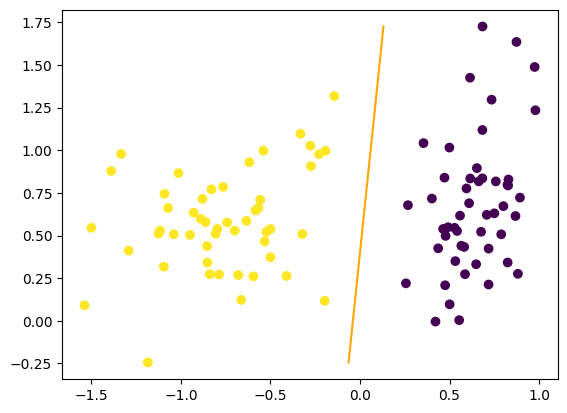

In [462]:
import matplotlib.pyplot as plt

w1, w2 = w
yy = np.linspace(np.min(xs[:, 1]), np.max(xs[:, 1]), 20)
xx = (w2 * yy + b)/(-w1)
plt.figure(1)
plt.plot(xx, yy, color="orange")
class_membership = np.sign(xs @ w + b)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=class_membership);

Plot the accuracy as a function of $t$ to see how we converged to a solution.

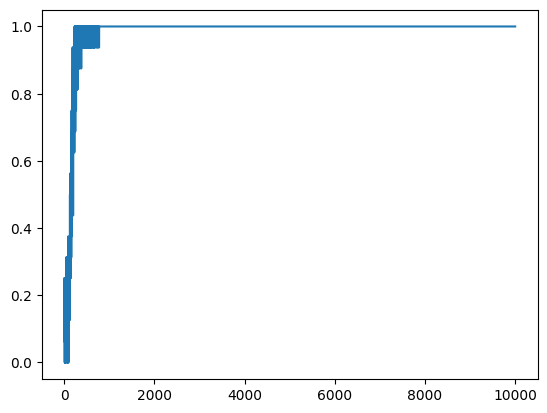

In [463]:
plt.figure(2)
plt.plot(accuracy);

## 2.5 Perceptron

The perceptron model defines a binary classifier of the form $\hat{y}(x) = \text{sgn}(\theta^T x)$, where $x \in \mathbb{R}^{d+1}$ is an input vector (with $x_0 = 1$ to include a bias term) and $\theta \in \mathbb{R}^{d+1}$ is a trainable weight vector. The function $\text{sgn}(\cdot)$ is the sign function, which maps the input to either $-1$ or $1$, assuming the class labels come from the set $\{-1, 1\}$.

The basic idea behind the perceptron is to adjust the weight vector $\theta$ so that $\theta^T x > 0$ for samples with class label $y = 1$ and $\theta^T x < 0$ for samples with class label $y = -1$. These criteria can be combined into a single condition:

<br>

$$
y \cdot \theta^T x > 0
$$


In this exercise, we will apply the perceptron model to the same dataset as before. However, we need to adapt the labels to fit the perceptron’s requirements, where $y \in \{-1, 1\}$ instead of $\{0, 1\}$.


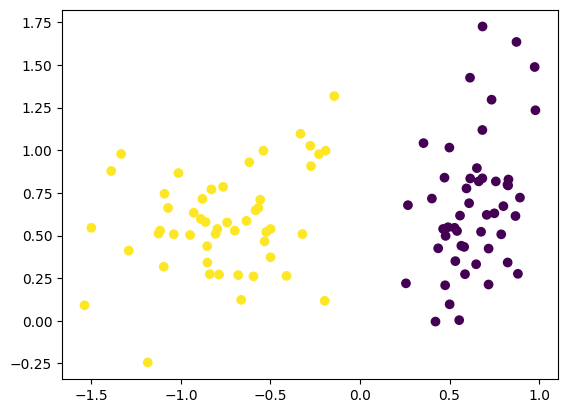

In [464]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
xs, ys = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=.65)
ys[ys == 0] = -1  # make the negative class labels == -1
plt.figure(0)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=ys);

Below is a helper function that plots both the dataset and the decision boundary of the perceptron based on the weight vector $\theta$. We will start by initializing $\theta$ to $\theta = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$ and visualizing the resulting decision boundary.


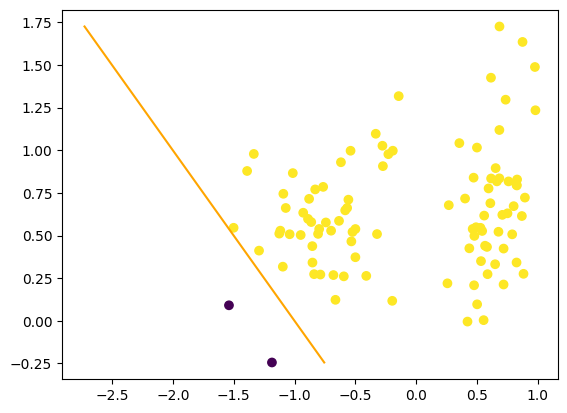

In [465]:
import numpy as np
def plot_perceptron(xs,w,t):
  """ input: xs data
             w = parameters [b w1 w2]
             t = figure handle
  """
  b, w1, w2 = w
  xs_hom = np.concatenate([np.ones(shape=[len(xs), 1]), xs], axis=1)
  yy = np.linspace(np.min(xs[:, 1]), np.max(xs[:, 1]), 20)
  xx = (w2 * yy + b)/(-w1)
  plt.figure(t)
  plt.plot(xx, yy, color="orange")
  class_membership = np.sign(xs_hom @ w)
  plt.scatter(x=xs[:, 0], y=xs[:, 1], c=class_membership)

t = plt.figure()
w0 = np.ones(2 + 1)
plot_perceptron(xs,w0,t)

**2.5.1** *Implement the perceptron algorithm as described in the Lecture Notes. Your implementation should include an option to plot the decision boundary every $t = 10$ iterations using the provided helper function.*

In [466]:
def perceptron_algo(xs_hom, w, ys, pl):
  """ input:  xs_hom = [n x d+1] augmented xs
              w = initial [b w1 w2]
              ys = [n x 1] labels
              pl = flag for plotting
      output: w = optimized w
              accuracy = list of accuracy over t
  """
  i = 0
  converged = False
  accuracy = []
  while not converged:
    predicted_y = np.sign(np.dot(xs_hom, w))
    # accuracy has to be based on the entire sample
    curr_accuracy = np.mean(predicted_y == ys)
    accuracy.append(curr_accuracy)
    if curr_accuracy == 1.0:
      converged = True
    for j in range(len(xs_hom)):
      curr_x = xs_hom[j]
      curr_y = ys[j]
      if curr_y != predicted_y[j]:
        w = w + curr_y*curr_x
    if (i % 10 == 0) and (pl):
      plot_perceptron(xs,w,i)
    i += 1
  return w, accuracy, i

**2.5.2** *Apply the perceptron algorithm to make a single pass over the dataset. Plot the decision boundary every 10 iterations, and also plot the accuracy of the perceptron model over time.*

(array([  1.        , -69.00165642,  -3.74451203]), [0.48, 0.52, 1.0], 3)

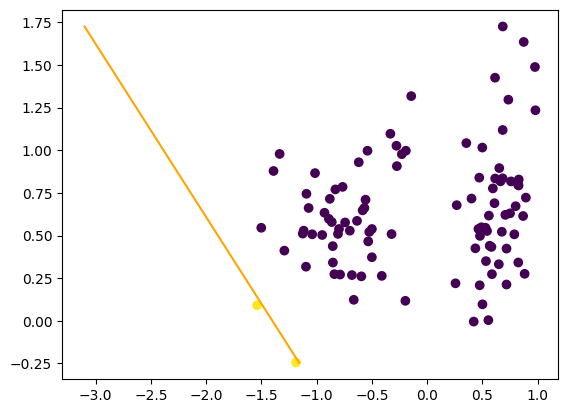

In [467]:
w0 = np.ones(2 + 1)
xs_hom = np.concatenate([np.ones(shape=[len(xs), 1]), xs], axis=1)
perceptron_algo(xs_hom, w0, ys, True)


Recall from the lecture notes the *perceptron loss* which is given by

<br>

$\begin{align}
\ell_{\text{perceptron}} (y_i, \hat{y}_i)  &= \text{max} (0, -y_i \, \theta^T x_i)
\end{align}$

<br>
and can be turned into an average loss

$\begin{align}
L(\theta)  &= \frac{1}{n} \sum_{i=1}^n \, \text{max} (0, -y_i \, \theta^T x_i)
\end{align}$

and rewritten

$\begin{align}
L(\theta)  &= - \frac{1}{n} \sum_{i \in \mathcal{M}} \, y_i \, \theta^T x_i
\end{align}$

where $\mathcal{M}$ are the set of samples that are misclassified $y_i \theta^T x_i < 0$.


## 2.6 SVM

In this exercise, we will explore Support Vector Machines (SVM) using `sklearn.svm`, which is based on the popular `libsvm` library. This implementation uses the dual formulation of the SVM optimization problem and relies on an SMO-like solver to optimize the model parameters $\theta$. The `sklearn.svm.SVC` model is one of the most widely used tools in machine learning, having made countless predictions across a variety of domains.

<br>

Let's start by generating our dataset, similar to previous exercises, and visualize it to understand the distribution of the classes.


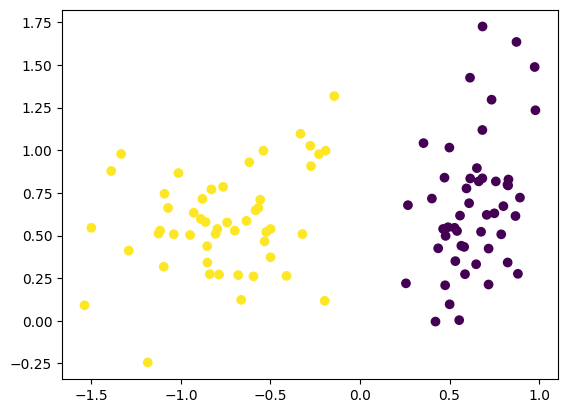

In [468]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
xs, ys = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=.65)
ys[ys == 0] = -1  # make the negative class labels == -1
plt.figure(0)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=ys);

**2.6.1** *Using `sklearn.svm`, fit an SVM model to the training data and report the model's accuracy on the same dataset.*

*Hint*: Training an SVM using `sklearn` is very similar to training a linear regression model. You can refer back to the previous exercises if needed.


In [469]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(xs, ys)
ys_pred = svm_model.predict(xs)

print("Accuracy: {}%".format(100.0 * np.mean(ys == ys_pred)))

Accuracy: 100.0%


Below is a plotting function that will help you visualize the decision boundary and margin of your trained SVM model. Use it to plot the results after training.


<ipython-input-470-73ddec9f6872>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])


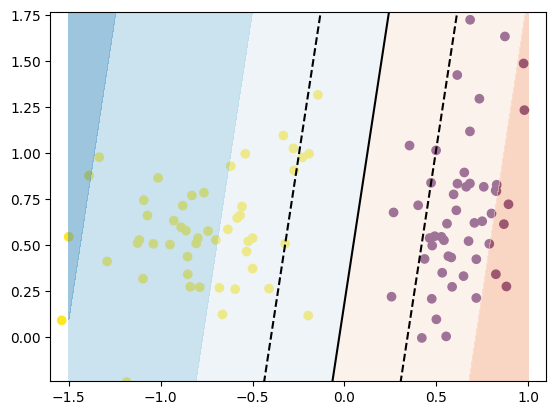

In [470]:
from matplotlib import cm

def plot_svm(model, xs, ys, h):
  """
  input:  model: sklearn.svm.SVC model
          theta: trained weights
          xs:    data
          ys:    labels
          h:     figure handle
  output: plots SVM for 3.9
  """
  # get the separating hyperplane
  theta = model.coef_[0]
  a = -theta[0] / theta[1]
  xx = np.linspace(-1.5, 1)
  yy = a * xx - (model.intercept_[0]) / theta[1]
  margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
  yy_neg = yy - np.sqrt(1 + a ** 2) * margin
  yy_pos = yy + np.sqrt(1 + a ** 2) * margin

  # plot the line, the points, and the nearest vectors to the plane
  plt.figure(h);
  plt.plot(xx, yy, "k-")
  plt.plot(xx, yy_neg, "k--")
  plt.plot(xx, yy_pos, "k--")
  plt.scatter(x=xs[:, 0], y=xs[:, 1], c=ys);
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  # Put the result into a contour plot
  plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])
  plt.xlim([-1.6,1.1])
  plt.ylim([-0.24,1.77])
  plt.show()


plot_svm(model,xs,ys,1)

The `C` hyperparameter in `sklearn.svm.SVC` controls the trade-off between achieving a larger margin and minimizing classification errors.

- A **small `C` value** allows for more slack, leading to a wider margin but potentially more misclassified points.
- A **large `C` value** results in a narrower margin, with the model focusing more on classifying every point correctly.

Try experimenting with different values of `C` to see how it affects the margin and the classification results.

<br>

**2.6.2** *Write code to fit two or more SVM models with different `C` values that allow for more slack (i.e., lower `C` values than the default). After fitting the models, analyze the consequences.*


<ipython-input-470-73ddec9f6872>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])


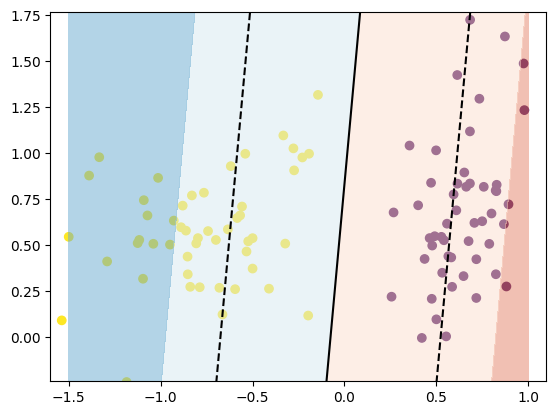

<ipython-input-470-73ddec9f6872>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])


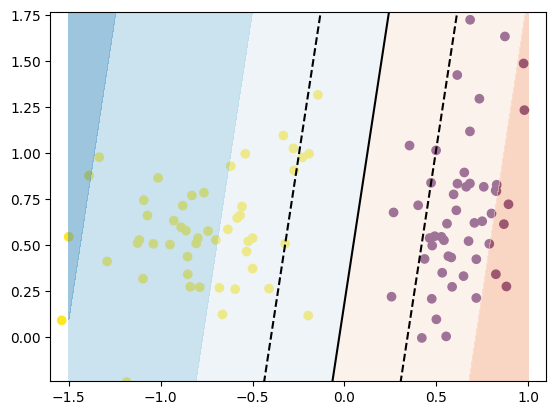

<ipython-input-470-73ddec9f6872>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])


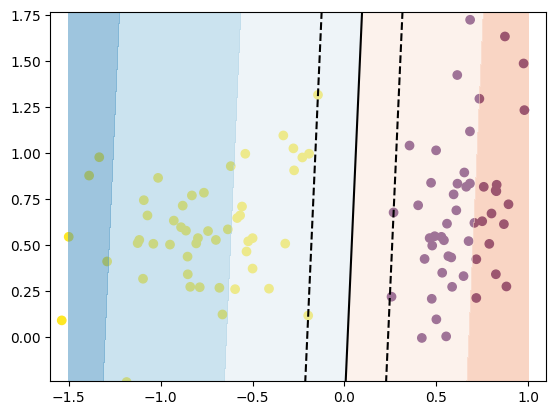

In [471]:
smallModel = SVC(kernel="linear", C=0.1)
smallModel.fit(xs, ys)
plot_svm(smallModel, xs, ys, 1)

middleModel = SVC(kernel="linear", C=1)
middleModel.fit(xs, ys)
plot_svm(middleModel, xs, ys, 1)

largeModel = SVC(kernel="linear", C=100.0)
largeModel.fit(xs, ys)
plot_svm(largeModel, xs, ys, 1)

We observe that a smaller C value increases the width of the decision boundary. We can see that this allows more data points to fall within this boundary, meaning that it potentially allows for more mistakes in classification in data, which is useful for generalisation but bad for accurate classification.

In contrast, a larger C value shrinks the width of the decision boundary, reducing tolerance for mistakes. While it means that the model makes fewer errors, this risks overfitting, and might not generalise well to new, unseen data.


## 2.7 Primal-Dual & Constrained Problems

In this exercise, we will solve a constrained optimization problem using primal-dual techniques. Consider an arbitrary point $p = \begin{bmatrix} p_1 \\ p_2 \\ p_3 \end{bmatrix} \in \mathbb{R}^3$ and a ball $S$ centered at the point $q = \begin{bmatrix} q_1 \\ q_2 \\ q_3 \end{bmatrix} \in \mathbb{R}^3$ with radius $R$. Our goal is to find the point on $S$ that is closest to $p$ in terms of the squared Euclidean distance.

This *constrained optimization* problem can be phrased as follows:
\begin{align}
\min_{{x}} \lVert {x} - {p} \rVert_2^2 \\
\text{subject to:} \lVert {x} - {q} \rVert_2^2 \leq R^2
\end{align}

which can be rewritten:
\begin{align}
\min_{{x}} f({x})=\lVert {x} - {p} \rVert_2^2 \\
\text{subject to: } g({x})= \lVert {x} - {q} \rVert_2^2 - R^2 \leq 0
\end{align}

<br>
The Lagrangian primal problem is:
\begin{align}
\min_{x \in \mathbb{R}} \mathcal{\psi_P}(x)  \\
\end{align}

<br>
and the Lagrangian dual problem is then given by:
\begin{align}
\max_{\alpha \in \mathbb{R}} \mathcal{\psi_D}(\alpha)  \\
\text{subject to: } \alpha \geq 0
\end{align}

<br>
where $\psi_\mathcal{D}(\alpha) = \min_{{x}} \mathcal{L}({x}, \alpha)$ and $\psi_\mathcal{P}(\alpha) = \max_{{\alpha}} \mathcal{L}({x}, \alpha)$, and $\mathcal{L}({x}, \alpha) = f({x}) + \alpha g({x})$.

**2.7.1** *Give the expression for the Lagrangian $\mathcal{L}$.*

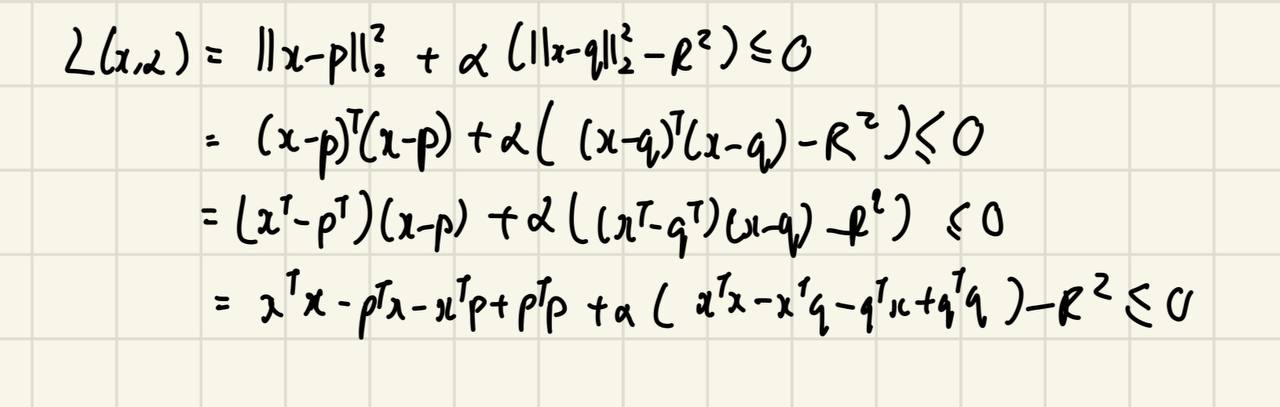

**2.7.2** *Derive the gradient $\frac{\partial L}{\partial x}$ and set it equal to zero $\frac{\partial L}{\partial x} = 0$. Simplify the expression to obtain the condition that must be satisfied at the optimal point.*

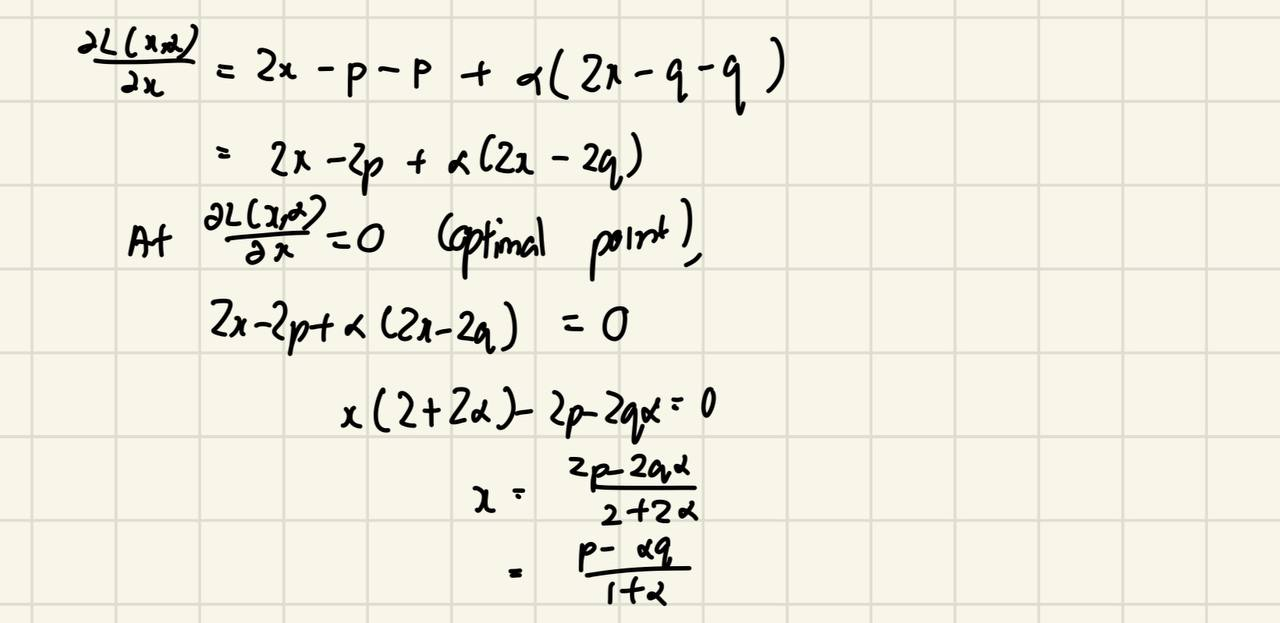

## 2.8 K-Medoids Clustering



Assume we have a dataset $\mathcal{D} = \lbrace \mathbf{x}_i \rbrace_{i=1}^N$ *without* any labels. Our goal is to identify a specific number of clusters, denoted by $K$, where data points tend to "gather" around certain central points, called medoids.

One effective method for clustering is **K-Medoids**. Unlike K-Means, which uses the mean of points in a cluster, K-Medoids selects actual data points as cluster centers (medoids). This method requires specifying $K$ in advance, reflecting our prior knowledge of how many clusters we expect in the data.

We begin by initializing the cluster centers, $\mathbf{S}_k$ ($k=1,\ldots,K$), by randomly selecting $K$ points from the dataset without repetition. These points serve as the initial medoids around which the other data points will be clustered.

To cluster the data points around the medoids, we use an iterative method known as *Voronoi iteration* or *Lloyd's Algorithm*. This algorithm involves two main steps:

1. **Assign**: Map each point $\mathbf{x}_i \in \mathcal{D}$ to the closest medoid $\mathbf{S}_k$ based on a chosen distance metric (Euclidean distance in this case).
2. **Update**: For each cluster $\mathbf{S}_k$, recompute the medoid by selecting the point within the cluster that minimizes the total distance to all other points in that cluster. This point is called the medoid.
3. **Repeat** step 1.


Your task is to implement the following three functions:
1. `initialize_cluster_centres_from_random_points`: Randomly select $K$ initial medoids from the dataset.
2. `assign`: Assign each point to the nearest medoid.
3. `update`: Recalculate the medoids based on the current assignments.

*Hint*: You can use the `scipy.spatial.distance.cdist` function to compute pairwise distances between points efficiently.


**2.8.1** *Implement the function to initialize $K$ cluster centers `initialize_cluster_centres_from_random_points(xs, K)`. This function should randomly select $K$ distinct points from the dataset `xs` to serve as the initial medoids.*

In [472]:
import numpy as np

def initialize_cluster_centres_from_random_points(xs, K):
    """
    Randomly samples K points from 'xs'
    Returns
      An np.ndarray of shape [K, d] containing the initial medoids
    """
    index = np.random.choice(len(xs), K, replace=False)
    samples = xs[index]
    print(samples)
    return samples

**2.8.2** *Implement the function `assign(xs, m)` to assign each data point $x_i$ in `xs` to the nearest medoid in `m`. The function should return a vector of cluster indices $z_i \in \{1,\ldots,K\}$ corresponding to the closest medoid for each point.*

In [473]:
from scipy.spatial.distance import cdist

def assign(xs, m):
    """
    Computes a vector of cluster indices for each point in 'xs'. Each point gets assigned to the closest cluster.
      xs: An np.ndarray of shape [N, d] where d is the dimension of the points
      m: An np.ndarray of shape [K, d] where K is the number of clusters

    Returns:
      An np.ndarray of shape [N]
    """
    z = np.ones((xs.shape[0]))
    for i in range(len(xs)):
        rowx = xs[i]
        smallest_dist = 10**4
        best_medoid_idx = -1
        for j in range(len(m)):
            rowm = m[j]
            dist = np.linalg.norm(rowx-rowm)
            if dist <= smallest_dist:
                smallest_dist = dist
                best_medoid_idx = j
        z[i] = best_medoid_idx
    return z

**2.8.3** *Implement the function `medoid_point(pts)` to return the medoid $m_k$ of a given set of points $S_k$. This function should calculate which point within $S_k$ minimizes the total distance to all other points in $S_k$ and return that point as the medoid.*

In [474]:
def medoid_point(pts):
    """
    Computes the medoid point (w.r.t. the Euclidean distance)
    pts: A np.ndarray of shape [N, d]

    Returns:
      An np.ndarray of shape [d] (the medoid)
    """
    min_point = np.ones(pts.shape[1])
    min_dist = 10**4
    for i in range(len(pts)):
        total_dist = 0
        for j in range(len(pts)):
            # don't need to remove itself because norm returns 0
            dist = np.linalg.norm(pts[i]-pts[j])
            total_dist += dist
        if total_dist < min_dist:
            min_dist = total_dist
            min_point = pts[i]
    return min_point

**2.8.4** *Implement the function `update(xs, m, z)` to assign new medoids that minimize the total distance to members within each cluster. For each cluster, use the function `medoid_point` to find the new medoid and update the array `m`.*

In [475]:
def update(xs, m, z):
    """
        xs: An np.ndarray of shape [N, d] where d is the dimension of the points
        m: An np.ndarray of shape [K, d] where K is the number of clusters
        z: An np.ndarray of shape [N] that maps each point to a cluster index

    Returns:
       An np.ndarray of shape [K, d]
    """
    K, d = m.shape
    new_m = np.zeros_like(m)
    for k in range(K):
      cluster_points = xs[z==k]
      if len(cluster_points) > 0:
          new_m[k] = medoid_point(cluster_points)
      else:
          new_m[k] = m[k]
    return new_m

Now, let's apply the functions on our favorite dataset. First, plot the unassigned points.

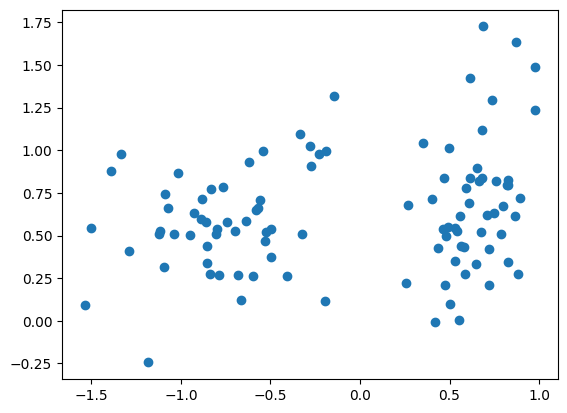

In [476]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
xs,_ = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=.65)
plt.scatter(x=xs[:, 0], y=xs[:, 1]);

Now, pick some initial medoids. We will use

[[ 0.26771419  0.67817479]
 [-0.7646902   0.78545112]]


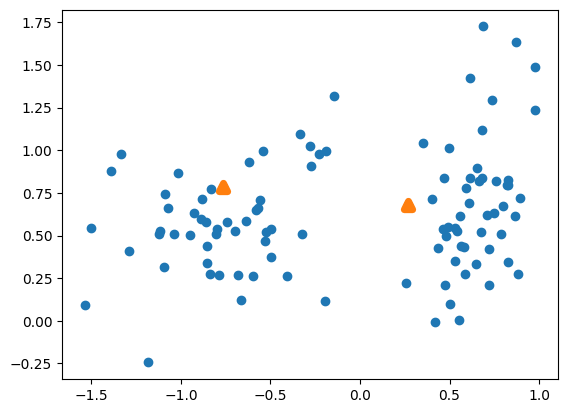

In [477]:
K = 2
m = initialize_cluster_centres_from_random_points(xs, K)
plt.scatter(x=xs[:, 0], y=xs[:, 1])
plt.scatter(x=m[:, 0], y=m[:, 1], marker="^", linewidth=5);

Apply the assignment step to get an initial clustering.

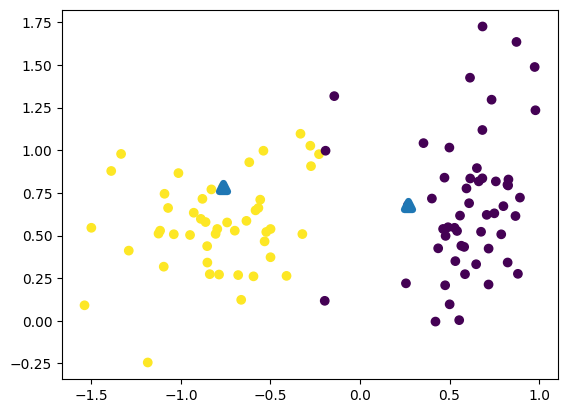

In [478]:
z = assign(xs, m)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=z)
plt.scatter(x=m[:, 0], y=m[:, 1], marker="^", linewidth=5);

**2.8.5** *Repeat the `update` and `assign` steps $t$ times, where $t$ is the number of iterations. After each iteration, plot the current clustering results to visualize how the clusters and medoids evolve over time.*

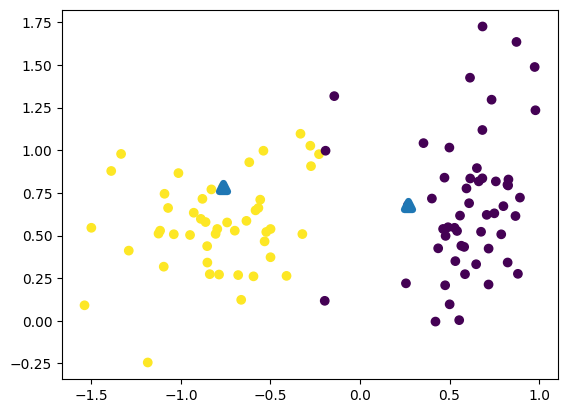

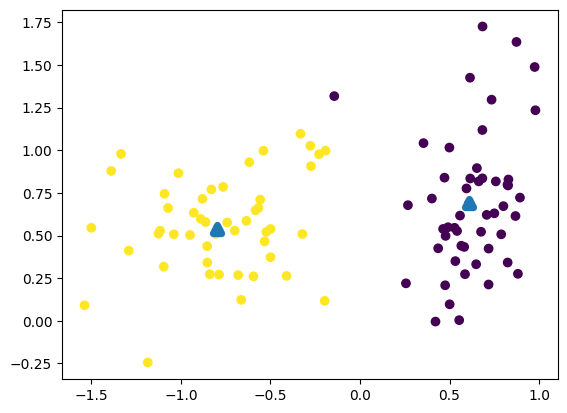

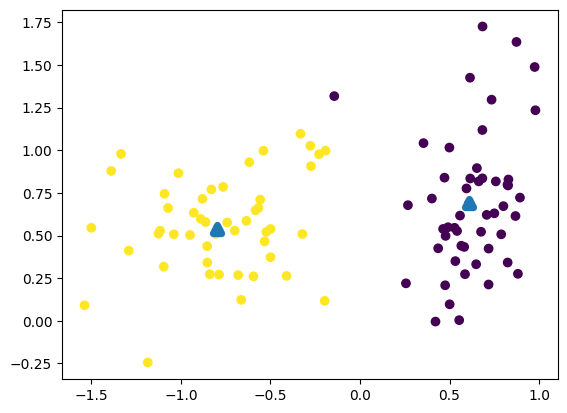

In [479]:
t = 3
for i in range(t):
  plt.figure()
  plt.scatter(x=xs[:, 0], y=xs[:, 1], c=z)
  plt.scatter(x=m[:, 0], y=m[:, 1], marker="^", linewidth=5);
  m = update(xs, m, z)
  z = assign(xs, m)